In [1]:
#pip install pandas shapely matplotlib geopandas
import requests
import pandas as pd
import json
from collections import defaultdict
from shapely.geometry import Point
import matplotlib.pyplot as plt
import openpyxl
import os
# Define output folder path
output_folder_path = os.path.join('..', '..','data','02_intermediate_output') 

In [2]:
def authenticate_user(email, password):
    post_data = {'email': email, 'password': password}
    auth_url = "https://api-service.fogocruzado.org.br/api/v2/auth/login"

    try:
        response = requests.post(auth_url, data=post_data)
        response.raise_for_status()  # Check for HTTP errors
        auth_data = response.json()
        access_token = auth_data["data"]["accessToken"]
        print("Authentication successful. ")
        # print("Access token:", access_token)
        return access_token
    except requests.exceptions.RequestException as e:
        print("Authentication failed. Error:", e)
        return None

def get_occurrences(access_token, id_cities, id_state, initial_date, final_date):
    headers = {'Authorization': f'Bearer {access_token}'}
    occurrences_url = "https://api-service.fogocruzado.org.br/api/v2/occurrences"
    occurrence_params = {
        "idCities": id_cities,
        "idState": id_state,
        #using maximum number of limit 
        "take": 10000000,
        "initialdate": initial_date,
        "finaldate": final_date
    }

    try:
        response = requests.get(occurrences_url, headers=headers, params=occurrence_params)
        response.raise_for_status()  
        #acquire json response data
        occurrences_data = response.json()["data"]
        return occurrences_data
    except requests.exceptions.RequestException as e:
        print(f"Failed to retrieve occurrences. Error: {e}")
        return None

def create_dataframe(occurrences_data):
    try:
        # Create a DataFrame from the acquired JSON data
        df = pd.DataFrame(occurrences_data)
        # as the data had some errors(non numeric values) we need to filter them out
        # Filter out rows with non-numeric 'longitude' values
        df = df[~df['longitude'].str.contains('v')]
        # Convert latitude and longitude columns to float
        df['latitude'] = df['latitude'].astype(float)
        df['longitude'] = df['longitude'].astype(float)
        return df
    except Exception as e:
        print(f"Error creating DataFrame: {e}")
        return None


To access the Fogo Cruzado API, you need to provide your email and password. For more information and to acquire data from their API, visit [Fogo Cruzado API](https://api.fogocruzado.org.br/).

In [3]:
#usage
    #setting parameters

# Enter credentials from the Fogocruzado website
email = "xxx@mail.com"
password = "yyyyyy"

#Rio de janeio's state and city id
id_state = "b112ffbe-17b3-4ad0-8f2a-2038745d1d14"
id_cities = "d1bf56cc-6d85-4e6a-a5f5-0ab3f4074be3"

# Desired date range to query
initial_date = "1990-01-01"
final_date = "2023-10-01"

#authentication 
access_token = authenticate_user(email, password)

if access_token:
    occurrences_data = get_occurrences(access_token, id_cities, id_state, initial_date, final_date)
    if occurrences_data:
        df = create_dataframe(occurrences_data)
        if df is not None:
            display(df.head())


Authentication successful. 


,id,documentNumber,address,state,region,city,neighborhood,subNeighborhood,locality,latitude,longitude,date,policeAction,agentPresence,relatedRecord,contextInfo,transports,victims,animalVictims
0,bff14f2b-f468-46d9-a82d-3ea2cb8e0011,5325,"Cidade de Deus, Rio de Janeiro - RJ, Brasil","{'id': 'b112ffbe-17b3-4ad0-8f2a-2038745d1d14',...","{'id': '31d96bb1-07fa-4a9e-b988-9b1beae828ed',...","{'id': 'd1bf56cc-6d85-4e6a-a5f5-0ab3f4074be3',...","{'id': '179f5e50-ff62-48aa-b42c-fa9368cd6ca6',...",None,"{'id': '1fde637d-57a9-4018-aed5-7f788e030447',...",-22.948170,-43.362671,2016-07-05T00:00:00.000Z,True,True,None,{'mainReason': {'id': '86b1d37b-f955-4015-9d63...,[],[],[]
1,66003d3f-d859-40d7-826a-97210c501ff8,5318,"Nova Brasília - Complexo do Alemão, Rio de Jan...","{'id': 'b112ffbe-17b3-4ad0-8f2a-2038745d1d14',...","{'id': '31d96bb1-07fa-4a9e-b988-9b1beae828ed',...","{'id': 'd1bf56cc-6d85-4e6a-a5f5-0ab3f4074be3',...","{'id': 'dbc9f145-a40c-4e4e-a6a9-72b5c19036e3',...",None,"{'id': '3accb247-6186-43b3-b1cc-f24c71564bf4',...",-22.866065,-43.272438,2016-07-05T00:00:00.000Z,True,True,None,{'mainReason': {'id': '86b1d37b-f955-4015-9d63...,[],[],[]
2,3b23c7f6-5604-4bff-a8eb-d0ab31121ba0,69,"Rua do Engenho Novo - Sampaio, Rio de Janeiro ...","{'id': 'b112ffbe-17b3-4ad0-8f2a-2038745d1d14',...","{'id': '31d96bb1-07fa-4a9e-b988-9b1beae828ed',...","{'id': 'd1bf56cc-6d85-4e6a-a5f5-0ab3f4074be3',...","{'id': '7a00d106-880b-4fd4-a717-1cfcd6e75283',...",None,"{'id': '31a6e463-312f-446d-935e-04a661905335',...",-22.901310,-43.263218,2016-07-05T00:40:00.000Z,False,False,None,{'mainReason': {'id': '6f855e33-1b82-446d-873f...,[],[],[]
3,dddc418e-222b-4be1-9d2a-b9d01c4645bb,16,"Favela do Rola - Santa Cruz, Rio de Janeiro - ...","{'id': 'b112ffbe-17b3-4ad0-8f2a-2038745d1d14',...","{'id': '31d96bb1-07fa-4a9e-b988-9b1beae828ed',...","{'id': 'd1bf56cc-6d85-4e6a-a5f5-0ab3f4074be3',...","{'id': '39a30adc-951b-40f0-8042-919da0d4c880',...",None,"{'id': '7d60a8de-677c-4942-b30b-7132accf839e',...",-22.919651,-43.684387,2016-07-05T06:02:00.000Z,True,True,None,{'mainReason': {'id': 'b70c8ccc-3c64-4189-8381...,[],[{'id': 'b59f5be1-9df5-495a-8952-c67d60234af4'...,[]
4,810bbb53-a095-4dd2-9661-2a10e1112e69,229,"Acari, Rio de Janeiro - State of Rio de Janeir...","{'id': 'b112ffbe-17b3-4ad0-8f2a-2038745d1d14',...","{'id': '31d96bb1-07fa-4a9e-b988-9b1beae828ed',...","{'id': 'd1bf56cc-6d85-4e6a-a5f5-0ab3f4074be3',...","{'id': '0d47eb93-c39d-4db6-9257-4446fb6ceffa',...",None,None,-22.825531,-43.344460,2016-07-05T11:50:00.000Z,True,True,None,{'mainReason': {'id': 'b70c8ccc-3c64-4189-8381...,[],[],[]


## Some analysis

In [4]:
crime_type_translation = {
    'Ação policial': 'Police Action',
    'Operação policial': 'Police Operation',
    'Não identificado': 'Unidentified',
    'Tentativa/Roubo': 'Attempted Robbery',
    'Homicidio/Tentativa': 'Homicide/Attempt',
    'Execução': 'Execution',
    'Disputa': 'Dispute',
    'Tentativa/Roubo de cargas': 'Attempted Cargo Robbery',
    'Briga': 'Fight',
    'Ataque a civis': 'Attack on Civilians',
    'Tiros a esmo': 'Shots Fired Randomly',
    'Arrastão': 'Street Robbery',
    'Tentativa/Roubo a banco': 'Attempted Bank Robbery',
    'Sequestro': 'Kidnapping',
    'Tortura': 'Torture',
    'Outro': 'Other',
    'Disparo Acidental': 'Accidental Discharge',
    'Suicídio': 'Suicide',
    'Sequestro/Cárcere Privado': 'Kidnapping/Prison'
}

# Initialize dictionaries to store aggregated information
crime_types = {}
total_killed = 0

# Iterate through the occurrences data
for occurrence in occurrences_data:
    # Extract relevant information
    main_reason = occurrence['contextInfo']['mainReason']['name']
    num_victims = len(occurrence['victims'])
    
    # Translate crime type
    translated_main_reason = crime_type_translation.get(main_reason, main_reason)
    
    # Aggregate crime types
    if translated_main_reason in crime_types:
        crime_types[translated_main_reason] += 1
    else:
        crime_types[translated_main_reason] = 1
    
    # Aggregate total number of people killed
    total_killed += num_victims


# Calculate total number of occurrences
total_occurrences = len(occurrences_data)


print(f"Total Number of shootings: {total_occurrences}")
print("----------------------------")
print(f"Total Number of People Killed: {total_killed}")
print(f"Types of Crimes:")
for crime, count in crime_types.items():
    percentage = (count / total_occurrences) * 100
    print(f"- {crime}: {count} shootings ({percentage:.2f}%)")

Total Number of shootings: 24205
----------------------------
Total Number of People Killed: 7681
Types of Crimes:
- Police Action: 3647 shootings (15.07%)
- Unidentified: 15494 shootings (64.01%)
- Police Operation: 2226 shootings (9.20%)
- Attempted Robbery: 1125 shootings (4.65%)
- Homicide/Attempt: 643 shootings (2.66%)
- Dispute: 521 shootings (2.15%)
- Shots Fired Randomly: 86 shootings (0.36%)
- Attack on Civilians: 61 shootings (0.25%)
- Attempted Cargo Robbery: 145 shootings (0.60%)
- Fight: 126 shootings (0.52%)
- Kidnapping/Prison: 23 shootings (0.10%)
- Street Robbery: 44 shootings (0.18%)
- Attempted Bank Robbery: 40 shootings (0.17%)
- Accidental Discharge: 10 shootings (0.04%)
- Torture: 4 shootings (0.02%)
- Suicide: 2 shootings (0.01%)
- Other: 8 shootings (0.03%)


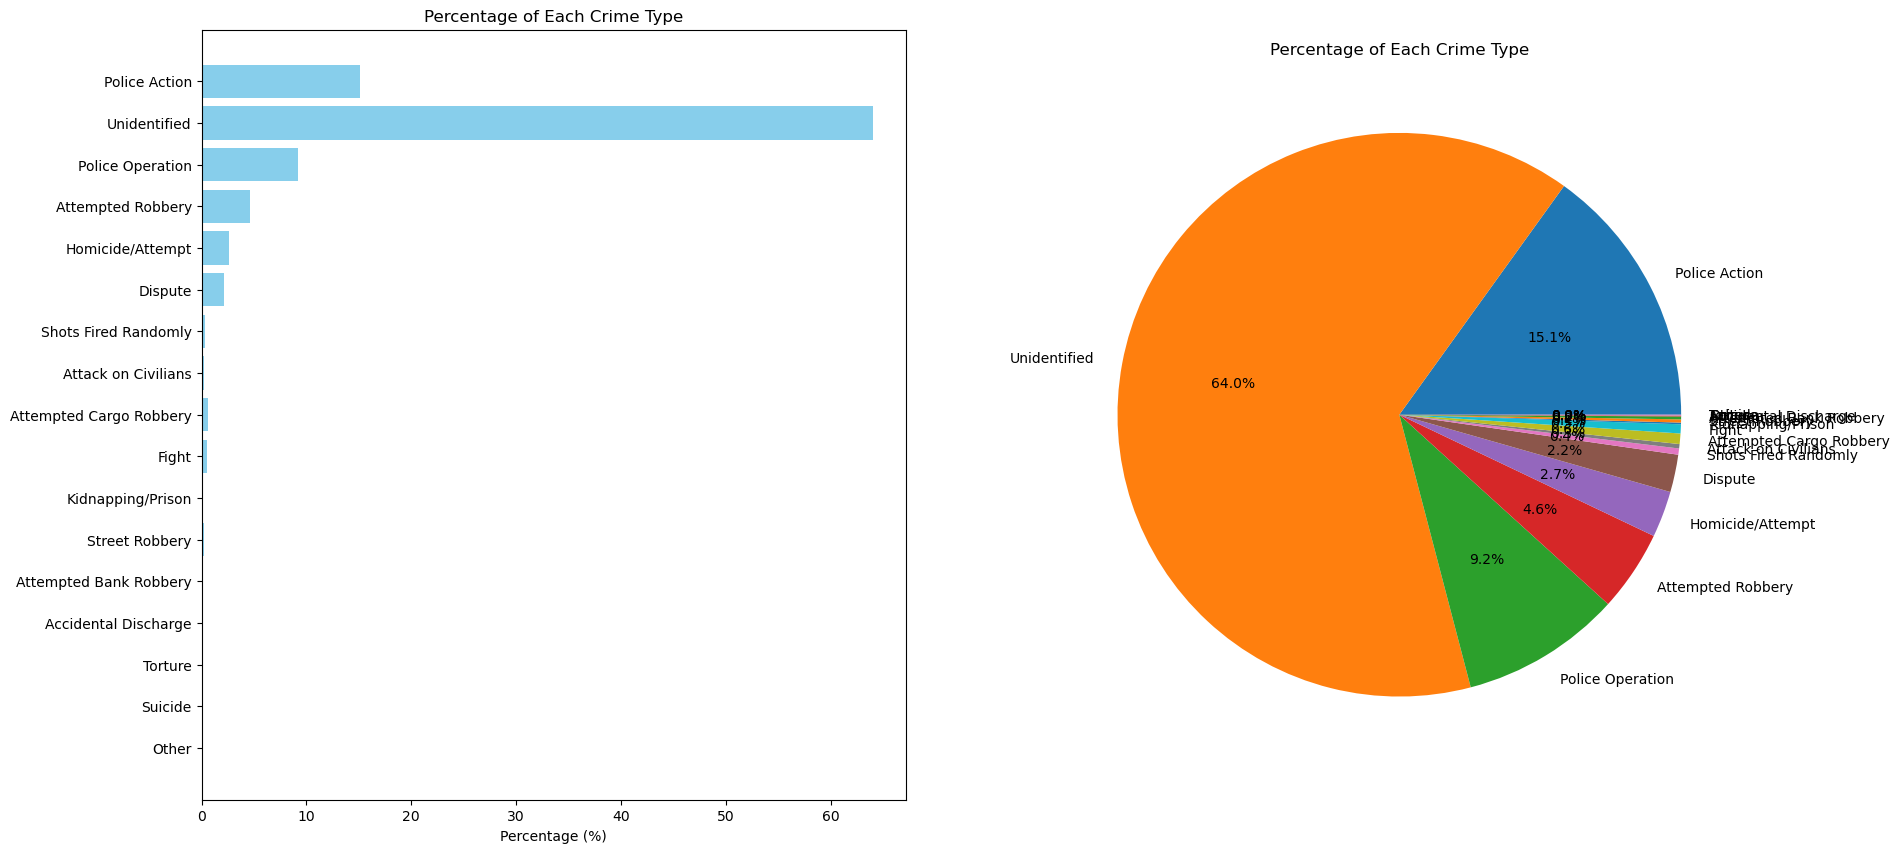

In [9]:
crime_percentages = [(count / total_occurrences) * 100 for count in crime_types.values()]

# Create figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Create bar plot on first subplot
ax1.barh(list(crime_types.keys()), crime_percentages, color='skyblue')
ax1.set_xlabel('Percentage (%)')
ax1.set_title('Percentage of Each Crime Type')
ax1.invert_yaxis()  # Invert y-axis to have the highest value at the top

# Create pie chart on second subplot
ax2.pie(crime_percentages, labels=crime_types.keys(), autopct='%1.1f%%')
ax2.set_title('Percentage of Each Crime Type')

# Show the plot
plt.show()

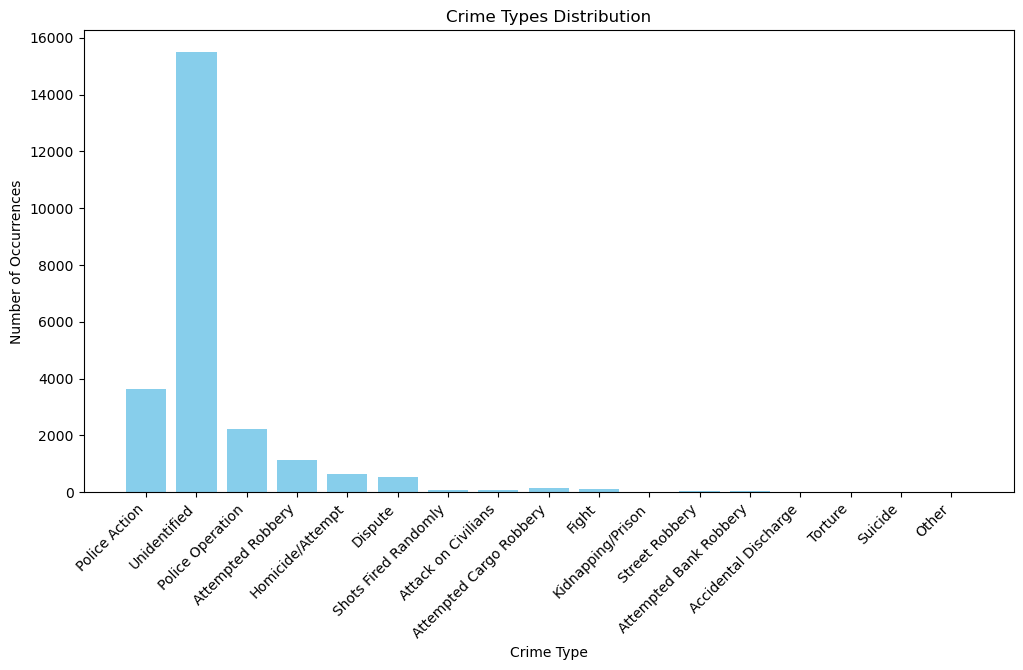

In [10]:
# Plot the crime types distribution
crime_labels = list(crime_types.keys())
crime_counts = list(crime_types.values())

plt.figure(figsize=(12, 6))
plt.bar(crime_labels, crime_counts, color='skyblue')
plt.xlabel('Crime Type')
plt.ylabel('Number of Occurrences')
plt.title('Crime Types Distribution')
plt.xticks(rotation=45, ha='right')
plt.show()

In [11]:
age_distribution = {}
gender_distribution = {}

# Iterate through the occurrences data
for occurrence in occurrences_data:
    victims = occurrence['victims']
    
    # Calculate age distribution
    for victim in victims:
        age_group = victim['ageGroup']['name']
        if age_group in age_distribution:
            age_distribution[age_group] += 1
        else:
            age_distribution[age_group] = 1
    
    # Calculate gender distribution
    for victim in victims:
        gender = victim['genre']['name']
        if gender in gender_distribution:
            gender_distribution[gender] += 1
        else:
            gender_distribution[gender] = 1

# Print age and gender distribution
print("Age Distribution of Victims:")
for age_group, count in age_distribution.items():
    print(f"- {age_group}: {count} victims")

print("Gender Distribution of Victims:")
for gender, count in gender_distribution.items():
    print(f"- {gender}: {count} victims")

Age Distribution of Victims:
- Adulto: 7112 victims
- Não identificado: 141 victims
- Adolescente: 207 victims
- Idoso: 145 victims
- Criança: 72 victims
- Feto: 4 victims
Gender Distribution of Victims:
- Homem cis: 6517 victims
- Não identificado: 570 victims
- Mulher cis: 588 victims
- Mulher trans e travesti: 6 victims


In [12]:
# Translation dictionaries
age_translation = {
    'Adulto': 'Adult',
    'Não identificado': 'Unknown age',
    'Adolescente': 'Teenager',
    'Idoso': 'Elder',
    'Criança': 'Child',
    'Feto': 'Fetus'
}

gender_translation = {
    'Homem cis': 'Male',
    'Não identificado': 'Unknown gender',
    'Mulher cis': 'Female',
    'Mulher trans e travesti': 'Transgender'
}

# Translate age distribution
translated_age_distribution = {age_translation[key]: value for key, value in age_distribution.items()}

# Translate gender distribution
translated_gender_distribution = {gender_translation[key]: value for key, value in gender_distribution.items()}

# Print age distribution
print("Age Distribution of Victims:")
for age_group, count in translated_age_distribution.items():
    print(f"- {age_group}: {count} victims")

# Print gender distribution
print("\nGender Distribution of Victims:")
for gender, count in translated_gender_distribution.items():
    print(f"- {gender}: {count} victims")


Age Distribution of Victims:
- Adult: 7112 victims
- Unknown age: 141 victims
- Teenager: 207 victims
- Elder: 145 victims
- Child: 72 victims
- Fetus: 4 victims

Gender Distribution of Victims:
- Male: 6517 victims
- Unknown gender: 570 victims
- Female: 588 victims
- Transgender: 6 victims


In [13]:
# # create manually a dictionary to store distributions

# # Initialize a dictionary to store distributions for different gender categories within each age group
# age_gender_distribution = {
#     'Adulto': {
#         'Homem cis': 0,
#         'Mulher cis': 0,
#         'Mulher trans e travesti': 0,
#         'Não identificado': 0
#     },
#     'Adolescente': {
#         'Homem cis': 0,
#         'Mulher cis': 0,
#         'Mulher trans e travesti': 0,
#         'Não identificado': 0
#     },
#     'Idoso': {
#         'Homem cis': 0,
#         'Mulher cis': 0,
#         'Mulher trans e travesti': 0,
#         'Não identificado': 0
#     },
#     'Criança': {
#         'Homem cis': 0,
#         'Mulher cis': 0,
#         'Mulher trans e travesti': 0,
#         'Não identificado': 0
#     },
#     'Feto': {
#         'Homem cis': 0,
#         'Mulher cis': 0,
#         'Mulher trans e travesti': 0,
#         'Não identificado': 0
#     },
#     'Não identificado': {
#         'Homem cis': 0,
#         'Mulher cis': 0,
#         'Mulher trans e travesti': 0,
#         'Não identificado': 0
#     }
# }

# # Iterate through the occurrences data
# for occurrence in occurrences_data:
#     victims = occurrence['victims']
    
#     # Iterate through victims of each occurrence
#     for victim in victims:
#         age_group = victim['ageGroup']['name']
#         gender = victim['genre']['name']
        
#         # Update the count for the corresponding age group and gender category
#         if age_group in age_gender_distribution and gender in age_gender_distribution[age_group]:
#             age_gender_distribution[age_group][gender] += 1

# # Create a DataFrame from the age_gender_distribution dictionary
# stat_df = pd.DataFrame(age_gender_distribution)

# # Translate column names
# stat_df.columns = stat_df.columns.map(lambda x: age_translation[x])

# # Translate index names
# stat_df.index = stat_df.index.map(lambda x: gender_translation[x])

# # Sum along rows (gender) and add as a new column
# stat_df['Total'] = stat_df.sum(axis=1)

# # Sum along columns (age) and add as a new row
# stat_df.loc['Total'] = stat_df.sum(axis=0)
# stat_df.dtypes

In [14]:

# Initialize a defaultdict to store distributions for different gender categories within each age group
age_gender_distribution = defaultdict(lambda: defaultdict(int))

# Iterate through the occurrences data
for occurrence in occurrences_data:
    victims = occurrence['victims']
    
    # Iterate through victims of each occurrence
    for victim in victims:
        age_group = victim['ageGroup']['name']
        gender = victim['genre']['name']
        
        # Update the count for the corresponding age group and gender category
        age_gender_distribution[age_group][gender] += 1

# Create a DataFrame from the age_gender_distribution dictionary
stat_df = pd.DataFrame(age_gender_distribution)

# Translate column names and index names if necessary
stat_df.columns = stat_df.columns.map(lambda x: age_translation[x])
stat_df.index = stat_df.index.map(lambda x: gender_translation[x])
stat_df = stat_df.round(2)
stat_df = stat_df.fillna(0)

# Sum along rows (gender) and add as a new column
stat_df['Total'] = stat_df.sum(axis=1)

# Sum along columns (age) and add as a new row
stat_df.loc['Total'] = stat_df.sum(axis=0)
# Convert the data types of the columns to int64
stat_df = stat_df.astype('int64')


In [15]:
# Create a DataFrame for percentages
stat_df_percentages = stat_df.copy()

# Calculate total fatalities
total_fatalities = stat_df.loc['Total', 'Total']
total_adult = stat_df.loc['Total', 'Adult']

# Convert counts to percentages
stat_df_percentages = stat_df_percentages.div(total_fatalities / 100, axis=1)

# Round the percentages to two decimal places
stat_df_percentages = stat_df_percentages.round(2)

# Add percentage symbol to index names
stat_df_percentages.index = stat_df_percentages.index.map(lambda x: f"{x} %")

# Add percentage symbol to column names
stat_df_percentages.columns = stat_df_percentages.columns.map(lambda x: f"{x} %")

In [16]:
def calc_ratio(df, groups, base='Total', base_label='Total'):

    result_df = pd.DataFrame()  # Initialize an empty DataFrame to store results
    for group in groups:
        total_group = df.loc[base, group]
        # Calculate percentages and rename columns
        result_df[f"{group} Ratio by {base_label} %"] = df[group] / (total_group / 100)
    return result_df.round(2)  # Round the percentages to two decimal places


In [17]:

# Define the list of subgroup names for age groups and genders
age_groups = stat_df.index
genders = stat_df.columns

# Calculate percentages for age groups by gender
age_by_gender_df = calc_ratio(stat_df.T, age_groups, base='Total', base_label='Age')

# Calculate percentages for gender by age groups
gender_by_age_df = calc_ratio(stat_df, genders, base='Total', base_label='Gender')



In [18]:
stat_df

,Adult,Unknown age,Teenager,Elder,Child,Fetus,Total
Male,6186,36,151,109,34,1,6517
Unknown gender,459,103,2,0,3,3,570
Female,461,2,54,36,35,0,588
Transgender,6,0,0,0,0,0,6
Total,7112,141,207,145,72,4,7681


In [20]:
stat_df_percentages

,Adult %,Unknown age %,Teenager %,Elder %,Child %,Fetus %,Total %
Male %,80.54,0.47,1.97,1.42,0.44,0.01,84.85
Unknown gender %,5.98,1.34,0.03,0.00,0.04,0.04,7.42
Female %,6.00,0.03,0.70,0.47,0.46,0.00,7.66
Transgender %,0.08,0.00,0.00,0.00,0.00,0.00,0.08
Total %,92.59,1.84,2.69,1.89,0.94,0.05,100.00


In [450]:
age_by_gender_df

,Male Ratio by Age %,Unknown gender Ratio by Age %,Female Ratio by Age %,Transgender Ratio by Age %,Total Ratio by Age %
Adult,94.92,80.53,78.40,100.0,92.59
Unknown age,0.55,18.07,0.34,0.0,1.84
Teenager,2.32,0.35,9.18,0.0,2.69
Elder,1.67,0.00,6.12,0.0,1.89
Child,0.52,0.53,5.95,0.0,0.94
Fetus,0.02,0.53,0.00,0.0,0.05
Total,100.00,100.00,100.00,100.0,100.00


In [453]:
gender_by_age_df

,Adult Ratio by Gender %,Unknown age Ratio by Gender %,Teenager Ratio by Gender %,Elder Ratio by Gender %,Child Ratio by Gender %,Fetus Ratio by Gender %,Total Ratio by Gender %
Male,86.98,25.53,72.95,75.17,47.22,25.0,84.85
Unknown gender,6.45,73.05,0.97,0.00,4.17,75.0,7.42
Female,6.48,1.42,26.09,24.83,48.61,0.0,7.66
Transgender,0.08,0.00,0.00,0.00,0.00,0.0,0.08
Total,100.00,100.00,100.00,100.00,100.00,100.0,100.00


In [21]:
gender_by_age_df

,Adult Ratio by Gender %,Unknown age Ratio by Gender %,Teenager Ratio by Gender %,Elder Ratio by Gender %,Child Ratio by Gender %,Fetus Ratio by Gender %,Total Ratio by Gender %
Male,86.98,25.53,72.95,75.17,47.22,25.0,84.85
Unknown gender,6.45,73.05,0.97,0.00,4.17,75.0,7.42
Female,6.48,1.42,26.09,24.83,48.61,0.0,7.66
Transgender,0.08,0.00,0.00,0.00,0.00,0.0,0.08
Total,100.00,100.00,100.00,100.00,100.00,100.0,100.00


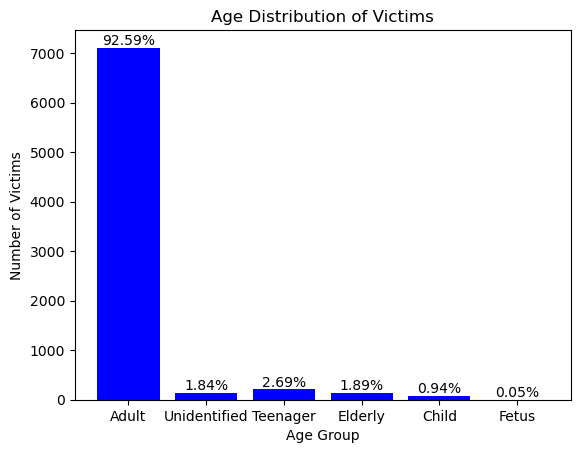

In [10]:
# Plotting the age distribution with percentages
ages = list(translated_age_distribution.keys())
counts = list(translated_age_distribution.values())
total_victims = sum(counts)

fig, ax = plt.subplots()
bars = plt.bar(ages, counts, color='blue')

# Add percentage labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    percentage = (yval / total_victims) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, yval, f'{percentage:.2f}%', ha='center', va='bottom', color='black')

plt.xlabel('Age Group')
plt.ylabel('Number of Victims')
plt.title('Age Distribution of Victims')
plt.show()


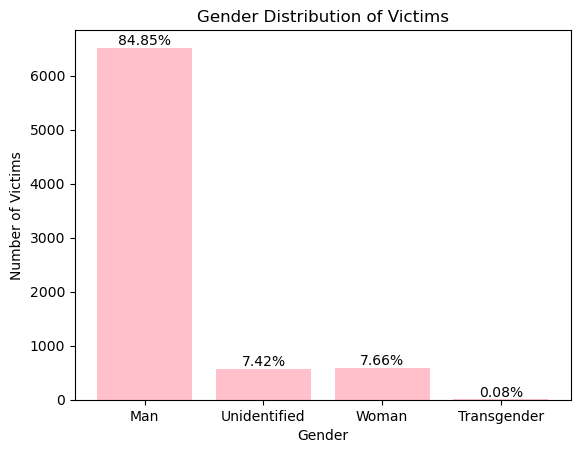

In [11]:
# Plotting the gender distribution with percentages
genders = list(translated_gender_distribution.keys())
gender_counts = list(translated_gender_distribution.values())
total_victims_gender = sum(gender_counts)

fig, ax = plt.subplots()
bars = plt.bar(genders, gender_counts, color='pink')

# Add percentage labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    percentage = (yval / total_victims_gender) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, yval, f'{percentage:.2f}%', ha='center', va='bottom', color='black')

plt.xlabel('Gender')
plt.ylabel('Number of Victims')
plt.title('Gender Distribution of Victims')
plt.show()


In [12]:
from collections import Counter
from dateutil.parser import parse

# Assuming 'occurrences_data' contains your data

# Create a Counter to count occurrences per day
occurrences_per_day = Counter()

# Iterate through the data and count occurrences by day
for occurrence in occurrences_data:
    date_str = occurrence['date']

    # Parse the date string using dateutil
    date_obj = parse(date_str)

    # Extract the date (ignoring time)
    date_only = date_obj.date()

    # Update the counter
    occurrences_per_day[date_only] += 1

# Calculate average, minimum, and maximum occurrences per day
total_occurrences = len(occurrences_data)
average_occurrences = total_occurrences / len(occurrences_per_day)
minimum_date, minimum_occurrences = min(occurrences_per_day.items(), key=lambda x: x[1])
maximum_date, maximum_occurrences = max(occurrences_per_day.items(), key=lambda x: x[1])

# Print the results
print(f"Average occurrences per day: {average_occurrences:.2f}")
print(f"Minimum occurrences in a day: {minimum_occurrences} on {minimum_date}")
print(f"Maximum occurrences in a day: {maximum_occurrences} on {maximum_date}")


Average occurrences per day: 9.20
Minimum occurrences in a day: 1 on 2016-11-27
Maximum occurrences in a day: 37 on 2016-07-15


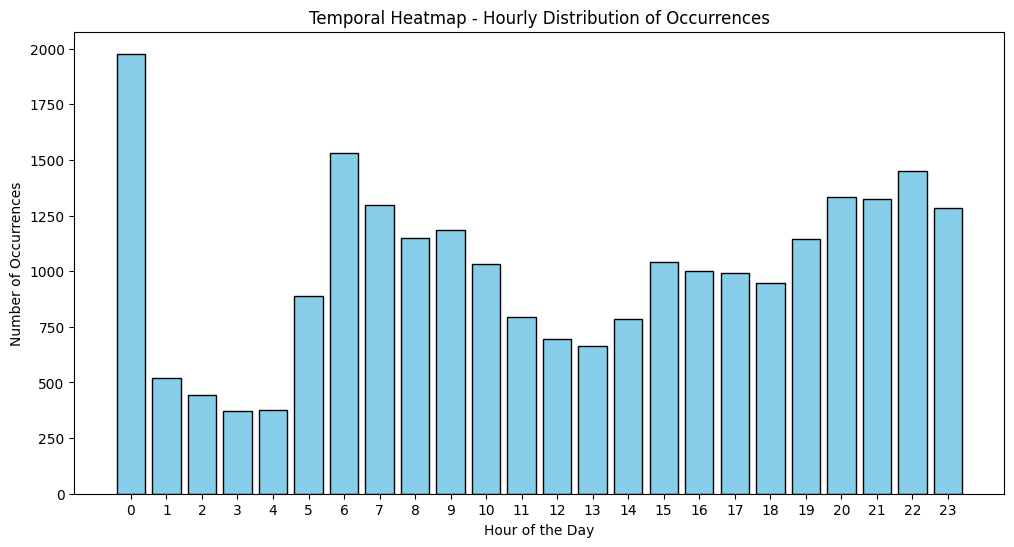

In [24]:

# Extract hour from each occurrence's date
hours = [parse(occurrence['date']).hour for occurrence in occurrences_data]

# Count occurrences per hour
hourly_counts = Counter(hours)

# Create a bar plot for the hourly distribution
plt.figure(figsize=(12, 6))
plt.bar(hourly_counts.keys(), hourly_counts.values(), color='skyblue', edgecolor='black')
plt.title('Temporal Heatmap - Hourly Distribution of Occurrences')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Occurrences')
plt.xticks(list(hourly_counts.keys()))
plt.show()

## saving as geojson

In [26]:
def clean_and_convert_occurrences(occurrences_data: list) -> list:
    cleaned_occurrences_data = []

    for occurrence in occurrences_data:
        if 'longitude' in occurrence and 'latitude' in occurrence:
            # Filter out rows with non-numeric 'longitude' values
            if 'v' not in str(occurrence['longitude']):
                # Convert latitude and longitude to float
                occurrence['latitude'] = float(occurrence['latitude'])
                occurrence['longitude'] = float(occurrence['longitude'])
                cleaned_occurrences_data.append(occurrence)

    return cleaned_occurrences_data

def flatten_attributes(d: dict, parent_key='', sep='_') -> dict:
    items = []
    for key, value in d.items():
        new_key = f"{parent_key}{sep}{key}" if parent_key else key
        if isinstance(value, dict):
            items.extend(flatten_attributes(value, new_key, sep=sep).items())
        else:
            items.append((new_key, value))
    return dict(items)


def create_geojson_features(occurrences_data: list) -> list:
    features = []

    for occurrence in occurrences_data:
        geometry = Point(occurrence['longitude'], occurrence['latitude'])
        properties = flatten_attributes(occurrence)

        feature = {
            'type': 'Feature',
            'geometry': geometry.__geo_interface__,
            'properties': properties
        }
        features.append(feature)

    return features

def save_geojson_to_file(feature_collection: dict, output_folder: str, filename: str = "shootings.geojson") -> None:
    filepath = os.path.join(output_folder, filename)
    with open(filepath, "w") as geojson_file:
        json.dump(feature_collection, geojson_file)

In [ ]:
# few rows had differnt dtypes, so we cleaned them
cleaned_occurrences_data = clean_and_convert_occurrences(occurrences_data)

In [ ]:
# Create GeoJSON features
features = create_geojson_features(cleaned_occurrences_data)

In [ ]:
# Save GeoJSON to file in the output folder

feature_collection = {'type': 'FeatureCollection', 'features': features}

save_geojson_to_file(feature_collection, output_folder_path)

Saving shootings stats

In [478]:
save_xl_path = os.path.join(output_folder_path, 'shootings_stats.xlsx')
with pd.ExcelWriter(save_xl_path) as writer:
    stat_df.to_excel(writer, sheet_name='overall_stats')
    stat_df_percentages.to_excel(writer, sheet_name='overall_stats_in_percentage')
    age_by_gender_df.to_excel(writer, sheet_name='age_by_gender')
    gender_by_age_df.to_excel(writer, sheet_name='gender_by_age_df')